In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2)

from scipy.optimize import curve_fit

: 

In [3]:
def lin_func(x,m,n):
    return m*x+n

In [4]:
gain = pd.read_csv('ganancias.txt', delimiter='\t',header = 0)

In [5]:
gain

,Mes,Dia,Temperatura,OV,V_op,Gain,DGain
0,Julio,7,-181,3,45.0,4240000.0,17600.0
1,Julio,7,-181,4,46.0,5990000.0,38100.0
2,Julio,7,-181,5,47.0,7910000.0,78900.0
3,Julio,5,-159,3,45.0,3210000.0,39000.0
4,Julio,5,-159,4,46.0,4840000.0,38900.0
5,Julio,5,-159,5,47.0,6540000.0,35900.0
6,Julio,6,-120,3,47.5,5070000.0,27500.0
7,Julio,6,-120,4,48.5,6810000.0,22500.0
8,Julio,6,-120,5,49.5,8650000.0,45300.0
9,Julio,6,-104,3,48.0,4780000.0,104000.0


In [6]:
T=[-159,-120,-104,50,-181]
for i in T:
    print(gain["Gain"][gain["Temperatura"]==i])

3    3210000.0
4    4840000.0
5    6540000.0
Name: Gain, dtype: float64
6    5070000.0
7    6810000.0
8    8650000.0
Name: Gain, dtype: float64
9     4780000.0
10    6500000.0
11    8250000.0
Name: Gain, dtype: float64
Series([], Name: Gain, dtype: float64)
0    4240000.0
1    5990000.0
2    7910000.0
Name: Gain, dtype: float64


Breakdown voltage for T = -181 ºC: 42.70
Breakdown voltage for T = -159 ºC: 43.08
Breakdown voltage for T = -120 ºC: 44.68
Breakdown voltage for T = -104 ºC: 45.25
Breakdown voltage for T = -50 ºC: 47.56
[42.70481379176769, 43.07907907907908, 44.67690875232773, 45.247838616714695, 47.56344086637061]


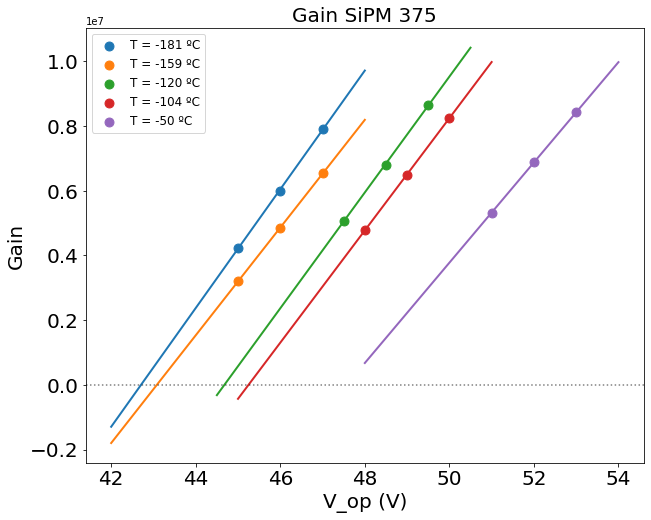

In [41]:
fig, ax = plt.subplots(1,1, figsize = (10,8))
T=[-181,-159,-120,-104,-50]
Vbr_exp = []
for i in T:
    plt.scatter(gain["V_op"][gain["Temperatura"]==i],gain["Gain"][gain["Temperatura"]==i],label = "T = %i ºC"%(i), s =80)
    popt, pcov = curve_fit(lin_func, gain["V_op"][gain["Temperatura"]==i],gain["Gain"][gain["Temperatura"]==i]); perr = np.sqrt(np.diag(pcov))
    p1 = np.asarray(gain["V_op"][gain["Temperatura"]==i])[0]-3; p2 = np.asarray(gain["V_op"][gain["Temperatura"]==i])[1]; p3 = np.asarray(gain["V_op"][gain["Temperatura"]==i])[2]+1
    plt.plot([p1,p2,p3],[lin_func(p1,*popt),lin_func(p2,*popt),lin_func(p3,*popt)], linewidth = 2)
    print("Breakdown voltage for T = %i ºC: %.2f"%(i,-lin_func(0,*popt)/popt[0]))
    Vbr_exp.append(-lin_func(0,*popt)/popt[0])
    

plt.title("Gain SiPM 375", fontsize = 20)
plt.axhline(0, c = "k", ls = ":", alpha = 0.5)
plt.xlabel("V_op (V)",fontsize = 20); plt.ylabel("Gain",fontsize = 20)
plt.xticks(size = 20); plt.yticks(size = 20)
plt.legend(fontsize = 12);
# plt.savefig("gain_fit_Gar.png", dpi = 600, bbox_inches = "tight")
print(Vbr_exp)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,8))
plt.scatter(T,Vbr_exp,label = "T = %i ºC"%(i), s =80)
popt, pcov = curve_fit(lin_func, gain["V_op"][gain["Temperatura"]==i],gain["Gain"][gain["Temperatura"]==i]); perr = np.sqrt(np.diag(pcov))
p1 = np.asarray(gain["V_op"][gain["Temperatura"]==i])[0]-3; p2 = np.asarray(gain["V_op"][gain["Temperatura"]==i])[1]; p3 = np.asarray(gain["V_op"][gain["Temperatura"]==i])[2]+1
plt.plot([p1,p2,p3],[lin_func(p1,*popt),lin_func(p2,*popt),lin_func(p3,*popt)], linewidth = 2)
print("Breakdown voltage for T = %i ºC: %.2f"%(i,-lin_func(0,*popt)/popt[0]))
Vbr_exp.append(-lin_func(0,*popt)/popt[0])
    

plt.title("Gain SiPM 375", fontsize = 20)
# plt.axhline(0, c = "k", ls = ":", alpha = 0.5)
plt.xlabel("T (ºC)",fontsize = 20); plt.ylabel("Vbr_exp (V)",fontsize = 20)
plt.xticks(size = 20); plt.yticks(size = 20)
plt.legend(fontsize = 12);
# plt.savefig("Vbr_exp_vs_T.png", dpi = 600, bbox_inches = "tight")
plt.show()

: 

# PDEs

In [10]:
sipm375 = pd.read_csv('sipm375_data.txt', delimiter='\t', header = 0)
critical_wvl = []
critical_pde = []
for l in sipm375["Wavelength"]:
    if l == 270 or l==340:
        critical_wvl.append(l)
        critical_pde.append(sipm375["375.00"][sipm375["Wavelength"]==l].item())
    if l==370:
        critical_wvl.append(365); critical_pde.append(np.mean((sipm375["375.00"][sipm375["Wavelength"]==360].item(),sipm375["375.00"][sipm375["Wavelength"]==l].item())))
    if l==320:
        critical_wvl.append(317); critical_pde.append(np.mean((sipm375["375.00"][sipm375["Wavelength"]==310].item(),sipm375["375.00"][sipm375["Wavelength"]==l].item())))
    if l==390:
        critical_wvl.append(385); critical_pde.append(np.mean((sipm375["375.00"][sipm375["Wavelength"]==380].item(),sipm375["375.00"][sipm375["Wavelength"]==l].item())))
    if l==480:
        critical_wvl.append(470); critical_pde.append(np.mean((sipm375["375.00"][sipm375["Wavelength"]==460].item(),sipm375["375.00"][sipm375["Wavelength"]==l].item())))
    if l==580:
        critical_wvl.append(570); critical_pde.append(np.mean((sipm375["375.00"][sipm375["Wavelength"]==560].item(),sipm375["375.00"][sipm375["Wavelength"]==l].item())))

for l in sipm375["Wavelength"]:
    if l == 280 or l== 400 or l == 420:
        critical_wvl.append(l)
        critical_pde.append(sipm375["375.00"][sipm375["Wavelength"]==l].item())
    if l==360:
        critical_wvl.append(355); critical_pde.append(np.mean((sipm375["375.00"][sipm375["Wavelength"]==350].item(),sipm375["375.00"][sipm375["Wavelength"]==l].item())))

In [12]:
jan1_pde = pd.read_csv('jan1_pde.txt', delimiter='\t',header = 0)
jan2_pde = pd.read_csv('jan2_pde.txt', delimiter='\t',header = 0)
feb1_pde = pd.read_csv('feb1_pde.txt', delimiter='\t',header = 0)
feb2_pde = pd.read_csv('feb2_pde.txt', delimiter='\t',header = 0)
april_pde = pd.read_csv('april_pde.txt', delimiter='\t',header = 0)
mean_pde = pd.read_csv('mean_pde.txt', delimiter='\t',header = 0)

gar1_pde = pd.read_csv('GAr1_pde.txt', delimiter='\t',header = 0)

In [14]:
gar1_pde.head()

,Temperatura,Wavelength,PDE_375 (RT),DPDE_375 (RT),PDE_375 (LN2),DPDE_375 (LN2),Ratio_375,DRatio_375
0,-50,340,26.00,2.5,20.69,1.36,0.80,0.05
1,-104,340,26.00,2.5,16.61,1.09,0.64,0.04
2,-181,340,26.00,2.5,12.90,0.85,0.50,0.03
3,-50,365,25.05,2.5,18.67,1.23,0.75,0.05
4,-104,365,25.05,2.5,15.59,1.02,0.62,0.04


In [ ]:
fig, ax = plt.subplots(1,1, figsize = (16,8))
plt.plot(sipm375["Wavelength"], sipm375["375.00"],'o', markersize = 8, color = "dimgray", label = "RT")
plt.errorbar(critical_wvl, critical_pde,0,5,'s', markersize = 9, color = "black")
plt.grid(axis="y",linewidth = 0.5)
plt.grid(axis="x",linewidth = 0.5)
plt.ylim(0,40); plt.ylabel("PDE (%)", size = 20); plt.yticks(size = 20)
plt.xlabel("Wavelength (nm)", size = 20); plt.xticks(np.arange(100, 950, step=50),size = 20)
# plt.savefig("jan_critical_wvls.png", dpi = 600)
# plt.savefig("feb_critical_wvls.png", dpi = 600)
# plt.savefig("april_critical_wvls.png", dpi = 600)
plt.show()

: 

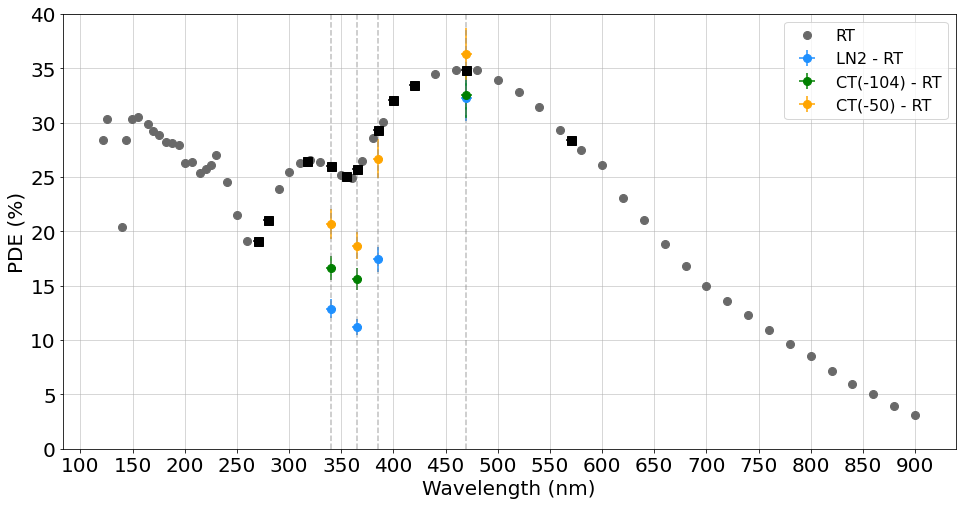

In [22]:
fig, ax = plt.subplots(1,1, figsize = (16,8))
plt.plot(sipm375["Wavelength"], sipm375["375.00"],'o', markersize = 8, color = "dimgray", label = "RT")
# plt.axvline(270, linestyle = "--", color = "grey", alpha = 0.5)
# plt.axvline(280, linestyle = "--", color = "grey", alpha = 0.5)
plt.axvline(340, linestyle = "--", color = "grey", alpha = 0.5)
plt.axvline(365, linestyle = "--", color = "grey", alpha = 0.5)
plt.axvline(385, linestyle = "--", color = "grey", alpha = 0.5)
# plt.axvline(405, linestyle = "--", color = "grey", alpha = 0.5)
# plt.axvline(420, linestyle = "--", color = "grey", alpha = 0.5)
plt.axvline(470, linestyle = "--", color = "grey", alpha = 0.5)
# plt.axvline(570, linestyle = "--", color = "grey", alpha = 0.5)
# plt.axvline(128, linestyle = "--", color = "skyblue", alpha = 0.5)

plt.errorbar(critical_wvl, critical_pde,0,5,'s', markersize = 9, color = "black")
# plt.errorbar(april_pde["Wavelength"][april_pde["Luz"]==1], april_pde["PDE_375 (LN2)"][april_pde["Luz"]==1],april_pde["DPDE_375 (LN2)"][april_pde["Luz"]==1],5,'o', markersize = 8, color= "darkblue", label = "05/04/22 - Lower light level")
# plt.errorbar(april_pde["Wavelength"][april_pde["Luz"]==1], april_pde["PDE_375 (LN2)"][april_pde["Luz"]==1],april_pde["DPDE_375 (LN2)"][april_pde["Luz"]==1],5,'o', markersize = 8, color= "darkblue", label = "05/04/22 - Lower light level")
plt.errorbar(gar1_pde["Wavelength"][gar1_pde["Temperatura"]=="-181"], gar1_pde["PDE_375 (LN2)"][gar1_pde["Temperatura"]=="-181"],
             gar1_pde["DPDE_375 (LN2)"][gar1_pde["Temperatura"]=="-181"],5,'o', markersize = 8, color= "dodgerblue", label = "LN2 - RT")
plt.errorbar(gar1_pde["Wavelength"][gar1_pde["Temperatura"]=="-104"], gar1_pde["PDE_375 (LN2)"][gar1_pde["Temperatura"]=="-104"],
             gar1_pde["DPDE_375 (LN2)"][gar1_pde["Temperatura"]=="-104"],5,'o', markersize = 8, color= "green", label = "CT(-104) - RT")
plt.errorbar(gar1_pde["Wavelength"][gar1_pde["Temperatura"]=="-50"], gar1_pde["PDE_375 (LN2)"][gar1_pde["Temperatura"]=="-50"],
             gar1_pde["DPDE_375 (LN2)"][gar1_pde["Temperatura"]=="-50"],5,'o', markersize = 8, color= "orange", label = "CT(-50) - RT")
# plt.legend(["RT","", "Oct", "Aug", "Jan1", "Jan2"])
ax.legend(fontsize = 16)
plt.grid(axis="y",linewidth = 0.5)
plt.grid(axis="x",linewidth = 0.5)

plt.ylim(0,40); plt.ylabel("PDE (%)", size = 20); plt.yticks(size = 20)
plt.xlabel("Wavelength (nm)", size = 20); plt.xticks(np.arange(100, 950, step=50),size = 20)
# plt.savefig("gar1_pde.png", dpi = 600,bbox_inches = "tight")
plt.show()

In [23]:
# Calculamos las medias de las tomas de datos con el dedo frío
cf_mean_pde_april = []; cf_mean_pde_april_error = []
cf_mean_ratio_april = []; cf_mean_ratio_april_error = []
for wvl in april_pde["Wavelength"]:
    cf_pde = np.mean([april_pde["PDE_375 (LN2)"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==1],april_pde["PDE_375 (LN2)"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==2]])
    cf_pde_error = np.mean([april_pde["DPDE_375 (LN2)"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==1],april_pde["DPDE_375 (LN2)"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==2]])
    cf_ratio = np.mean([april_pde["Ratio_375"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==1],april_pde["Ratio_375"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==2]])
    cf_ratio_error = np.mean([april_pde["DRatio_375"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==1],april_pde["DRatio_375"][april_pde["Wavelength"]==wvl][april_pde["Luz"]==2]])
    cf_mean_pde_april.append(cf_pde)
    cf_mean_pde_april_error.append(cf_pde_error)
    cf_mean_ratio_april.append(cf_ratio)
    cf_mean_ratio_april_error.append(cf_ratio_error)
print(cf_mean_pde_april)

cf_mean_pde_feb = []; cf_mean_pde_feb_error = []
cf_mean_ratio_feb = []; cf_mean_ratio_feb_error = []
for wvl in feb1_pde["Wavelength"]:
    cf_pde = np.mean([feb1_pde["PDE_375 (LN2)"][feb1_pde["Wavelength"]==wvl],feb2_pde["PDE_375 (LN2)"][feb2_pde["Wavelength"]==wvl]])
    cf_pde_error = np.mean([feb1_pde["DPDE_375 (LN2)"][feb1_pde["Wavelength"]==wvl],feb2_pde["DPDE_375 (LN2)"][feb2_pde["Wavelength"]==wvl]])
    cf_ratio = np.mean([feb1_pde["Ratio_375"][feb1_pde["Wavelength"]==wvl],feb2_pde["Ratio_375"][feb2_pde["Wavelength"]==wvl]])
    cf_ratio_error = np.mean([feb1_pde["DRatio_375"][feb1_pde["Wavelength"]==wvl],feb2_pde["DRatio_375"][feb2_pde["Wavelength"]==wvl]])
    cf_mean_pde_feb.append(cf_pde)
    cf_mean_pde_feb_error.append(cf_pde_error)
    cf_mean_ratio_feb.append(cf_ratio)
    cf_mean_ratio_feb_error.append(cf_ratio_error)
print(cf_mean_pde_feb)

cf_mean_pde = []; cf_mean_pde_error = []
cf_mean_ratio = []; cf_mean_ratio_error = []
for wvl in jan1_pde["Wavelength"]:
    cf_pde = np.mean([jan1_pde["PDE_375 (LN2)"][jan1_pde["Wavelength"]==wvl],jan2_pde["PDE_375 (LN2)"][jan2_pde["Wavelength"]==wvl]])
    cf_pde_error = np.mean([jan1_pde["DPDE_375 (LN2)"][jan1_pde["Wavelength"]==wvl],jan2_pde["DPDE_375 (LN2)"][jan2_pde["Wavelength"]==wvl]])
    cf_ratio = np.mean([jan1_pde["Ratio_375"][jan1_pde["Wavelength"]==wvl],jan2_pde["Ratio_375"][jan2_pde["Wavelength"]==wvl]])
    cf_ratio_error = np.mean([jan1_pde["DRatio_375"][jan1_pde["Wavelength"]==wvl],jan2_pde["DRatio_375"][jan2_pde["Wavelength"]==wvl]])
    cf_mean_pde.append(cf_pde)
    cf_mean_pde_error.append(cf_pde_error)
    cf_mean_ratio.append(cf_ratio)
    cf_mean_ratio_error.append(cf_ratio_error)
print(cf_mean_pde)

[8.945, 11.775, 13.57, 12.155000000000001, 17.93, 31.22, 22.134999999999998, 8.945, 11.775, 13.57, 12.155000000000001, 17.93, 31.22, 22.134999999999998]
[9.120000000000001, 9.74, 13.805, 13.765, 16.715, 30.865000000000002, 23.015]
[8.135000000000002, 10.315000000000001, 18.365000000000002, 22.14]


In [37]:
mean_pde1 = mean_pde[3:10]
mean_pde1 = mean_pde1.drop(index = [4,7,8])
mean_pde1

,Wavelength,Mean_Ratio,DMean_Ratio,Mean_PDE (LN2),DMean_PDE (LN2)
3,340,0.53,0.06,13.69,1.99
5,365,0.47,0.01,12.16,1.23
6,385,0.59,0.04,17.32,1.88
9,470,0.89,0.02,31.04,2.32


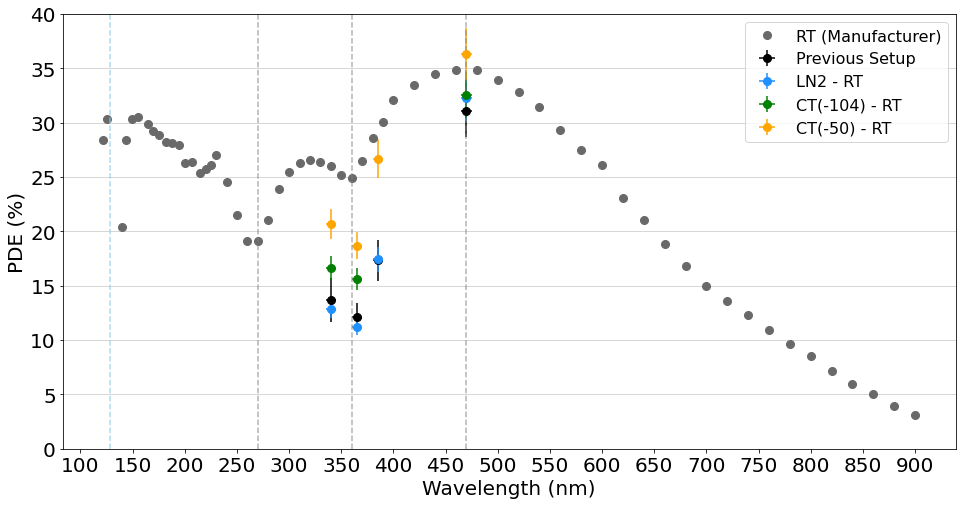

In [39]:
fig, ax = plt.subplots(1,1, figsize = (16,8))
plt.plot(sipm375["Wavelength"], sipm375["375.00"],'o', markersize = 8, color = "dimgray", label = "RT (Manufacturer)")
plt.axvline(128, linestyle = "--", color = "skyblue", alpha = 0.7)
plt.axvline(270, linestyle = "--", color = "grey", alpha = 0.6)
plt.axvline(360, linestyle = "--", color = "grey", alpha = 0.6)
# plt.axvline(405, linestyle = "--", color = "grey", alpha = 0.6)
# plt.axvline(420, linestyle = "--", color = "grey", alpha = 0.6)
plt.axvline(470, linestyle = "--", color = "grey", alpha = 0.6)

# plt.errorbar(critical_wvl, critical_pde,2,5,'s', markersize = 9, color = "black")
# plt.errorbar(aug_pde["Wavelength"], ln2_mean_pde,3,10,'o', markersize = 8, color= "red", label = "LN2")
plt.errorbar(mean_pde1["Wavelength"], mean_pde1["Mean_PDE (LN2)"],mean_pde1["DMean_PDE (LN2)"],5,'o', markersize = 8, color= "black", label= "Previous Setup")
plt.errorbar(gar1_pde["Wavelength"][gar1_pde["Temperatura"]=="-181"], gar1_pde["PDE_375 (LN2)"][gar1_pde["Temperatura"]=="-181"],
             gar1_pde["DPDE_375 (LN2)"][gar1_pde["Temperatura"]=="-181"],5,'o', markersize = 8, color= "dodgerblue", label = "LN2 - RT")
plt.errorbar(gar1_pde["Wavelength"][gar1_pde["Temperatura"]=="-104"], gar1_pde["PDE_375 (LN2)"][gar1_pde["Temperatura"]=="-104"],
             gar1_pde["DPDE_375 (LN2)"][gar1_pde["Temperatura"]=="-104"],5,'o', markersize = 8, color= "green", label = "CT(-104) - RT")
plt.errorbar(gar1_pde["Wavelength"][gar1_pde["Temperatura"]=="-50"], gar1_pde["PDE_375 (LN2)"][gar1_pde["Temperatura"]=="-50"],
             gar1_pde["DPDE_375 (LN2)"][gar1_pde["Temperatura"]=="-50"],5,'o', markersize = 8, color= "orange", label = "CT(-50) - RT")
# plt.errorbar(jan2_pde["Wavelength"], jan2_pde["Mean_PDE (LN2)"],2,5,'o', markersize = 8, color= "dodgerblue", label = "Cold finger")
# plt.legend(["RT","", "Oct", "Aug", "Jan1", "Jan2"])
ax.legend(fontsize = 16)
plt.grid(axis="y",linewidth = 0.5)

plt.ylim(0,40); plt.ylabel("PDE (%)", size = 20); plt.yticks(size = 20)
plt.xlabel("Wavelength (nm)", size = 20); plt.xticks(np.arange(100, 950, step=50),size = 20)
# plt.savefig("CF_vs_GAr.png", dpi = 800, bbox_inches='tight')
plt.show()